About Dataset
Education:
1. 'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'

EnvironmentSatisfaction:
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

JobInvolvement:
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

JobSatisfaction:
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

PerformanceRating:
1. 'Low'
2. 'Good'
3. 'Excellent'
4. 'Outstanding'

RelationshipSatisfaction:
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

WorkLifeBalance:
1. 'Bad'
2. 'Good'
3. 'Better'
4. 'Best'

# Import Libraries

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats


import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
df = pd.read_csv('IBM employee dataset.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeCount             1058 non-null   int64 
 9   EmployeeNumber            1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                

In [5]:
df.shape

(1058, 35)

In [6]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.00000,...,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
mean,37.055766,0.169187,809.542533,8.978261,2.879017,1.0,731.753308,2.712665,65.643667,2.73724,...,2.726843,80.0,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,9.410421,0.375094,408.478049,8.040608,1.031442,0.0,431.418209,1.092959,20.324861,0.70473,...,1.090970,0.0,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.00000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,30.000000,0.000000,465.250000,2.000000,2.000000,1.0,364.500000,2.000000,48.000000,2.00000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,36.000000,0.000000,817.500000,7.000000,3.000000,1.0,723.500000,3.000000,65.000000,3.00000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,43.000000,0.000000,1168.500000,13.000000,4.000000,1.0,1101.750000,4.000000,83.000000,3.00000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1487.000000,4.000000,100.000000,4.00000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


# Data Cleaning

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# Check duplicated rows
df.duplicated().sum()

0

In [9]:
# Get duplicated data by user_id
df[df.duplicated(subset='Education')]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,57,0,Travel_Rarely,405,Research & Development,1,2,Life Sciences,1,1483,...,1,80,1,13,2,2,12,9,2,8
1054,49,0,Travel_Rarely,1490,Research & Development,7,4,Life Sciences,1,1484,...,2,80,2,29,3,3,8,7,0,7
1055,34,0,Travel_Frequently,829,Research & Development,15,3,Medical,1,1485,...,4,80,2,16,3,2,14,8,6,9
1056,28,1,Travel_Frequently,1496,Sales,1,3,Technical Degree,1,1486,...,4,80,1,5,3,4,3,2,1,2


There's no duplicate and missing data

In [26]:
edu = df['Education']
perform = df['PerformanceRating']

In [22]:
a = df.groupby('Education').sample(frac=.3)
a

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1049,30,0,Travel_Rarely,1358,Sales,16,1,Life Sciences,1,1479,...,3,80,2,4,2,2,2,1,2,2
498,22,0,Travel_Rarely,604,Research & Development,6,1,Medical,1,675,...,4,80,0,3,3,3,2,2,2,2
314,39,0,Travel_Rarely,117,Research & Development,10,1,Medical,1,429,...,4,80,0,21,3,3,21,9,11,10
834,34,0,Travel_Rarely,1400,Sales,9,1,Life Sciences,1,1163,...,1,80,0,6,3,2,6,5,1,3
810,46,0,Travel_Rarely,406,Sales,3,1,Marketing,1,1124,...,4,80,1,23,3,3,12,9,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,44,0,Travel_Frequently,383,Sales,1,5,Marketing,1,1481,...,3,80,1,11,4,2,1,0,0,0
337,29,0,Travel_Rarely,738,Research & Development,9,5,Other,1,455,...,3,80,0,4,2,3,3,2,2,2
329,47,0,Travel_Rarely,1482,Research & Development,5,5,Life Sciences,1,447,...,2,80,1,21,2,3,3,2,1,1
887,42,0,Travel_Frequently,458,Research & Development,26,5,Medical,1,1242,...,3,80,0,20,6,3,1,0,0,0


In [30]:
edu = df['Education']
perform = df['PerformanceRating']
res = edu - perform

In [31]:
res

0      -1
1      -3
2      -1
3       1
4      -2
       ..
1053   -2
1054    1
1055    0
1056    0
1057    0
Length: 1058, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1f937d916d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f93cb00ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f937d924d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1f937d5ca50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f937d6b850>,
 'means': [<matplotlib.lines.Line2D at 0x1f937d5db90>,
  <matplotlib.lines.Line2D at 0x1f93cbae110>]}

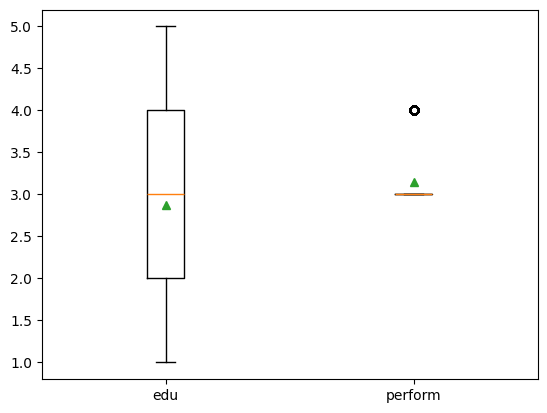

In [32]:
plt.boxplot([edu, perform], labels=['edu', 'perform'], showmeans=True)

<Axes: ylabel='Density'>

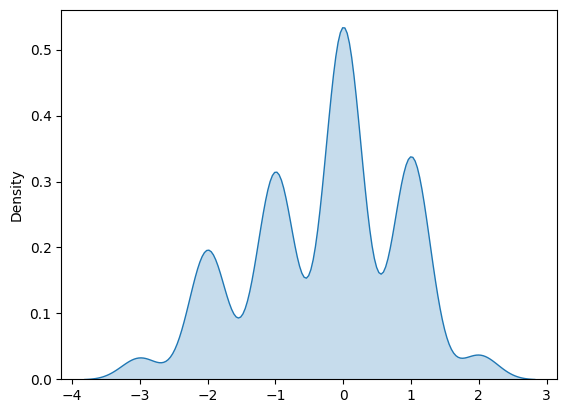

In [33]:
sns.kdeplot(res, shade=True)

((array([-3.21380894, -2.94983542, -2.80260701, ...,  2.80260701,
          2.94983542,  3.21380894]),
  array([-3, -3, -3, ...,  2,  2,  2], dtype=int64)),
 (1.0598385720747956, -0.27126654064272193, 0.9561114959802033))

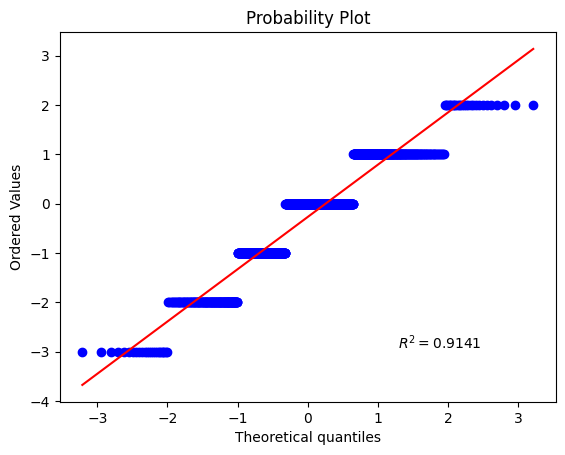

In [34]:
# probabilistic plot
stats.probplot(res, plot=plt, rvalue=True)

In [35]:
# shapiro
stats.shapiro(res)

ShapiroResult(statistic=0.9131844639778137, pvalue=4.02785633445109e-24)

In [36]:
stats.levene(edu, perform)

LeveneResult(statistic=653.4771696217434, pvalue=8.03953754711768e-126)

# Designing the Hypothesis to Test

We want to see Employee Performance by Education Level

The confidence level was 95%, so the significance level(alpha) is 5% or 0.05

- α = 0.05

Null Hypothesis ($H_0$):
  - $H_1 : \mu_1 = \mu_2 = \mu_3 = \mu_4 = \mu_5$

There is no significant difference in the mean performance of employees with different education levels.

Alternative Hypothesis ($H_1$):
- $H_0 : \mu_1 \not= \mu_2 \not= \mu_3 \not= \mu_4 \not= \mu_5$

Use an independent samples t-test to compare performance scores between employees with different education levels.

# Hypothesis Testing

In [37]:
# Welch's t-test
t_statistic, p_value = stats.ttest_ind(edu, perform, equal_var=False)

# Show result
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Set your chosen significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is no significant difference in mean performance by education.")
else:
    print("Fail to reject the null hypothesis. There is a significant difference in mean performance by education.")

T-statistic: -8.082708922931962
P-value: 1.429827413764876e-15
Reject the null hypothesis. There is no significant difference in mean performance.
